<a href="https://colab.research.google.com/github/KolluriPriyanka/Alzheimer-s-Disease/blob/main/AD_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import random 
import cv2

import keras
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers
from keras.models import Sequential

In [15]:
!python --version

Python 3.9.16


In [16]:
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


In [19]:
train_path = "/content/drive/MyDrive/Alzheimer's Dataset/Alzheimer_s Dataset/train"
test_path = "/content/drive/MyDrive/Alzheimer's Dataset/Alzheimer_s Dataset/test"

In [20]:
train_batches = ImageDataGenerator(validation_split=0.1) \
                .flow_from_directory(directory=train_path,  
                                     classes = ['NonDemented', 'VeryMildDemented', 
                                                'MildDemented', 'ModerateDemented'], 
                                     subset='training',
                                     batch_size=10)

validation_batches = ImageDataGenerator(validation_split=0.1) \
                     .flow_from_directory(directory=train_path, 
                                          classes = ['NonDemented', 'VeryMildDemented', 
                                                     'MildDemented', 'ModerateDemented'], 
                                          subset='validation',
                                          batch_size=10)
                
test_batches = ImageDataGenerator() \
                    .flow_from_directory(directory=test_path, 
                                         classes = ['NonDemented', 'VeryMildDemented', 
                                                    'MildDemented', 'ModerateDemented'], 
                                         batch_size=10, 
                                         shuffle=False)

Found 4610 images belonging to 4 classes.
Found 511 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


<BarContainer object of 4 artists>

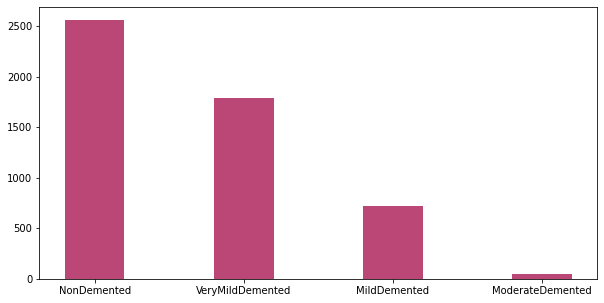

In [21]:
data = {'NonDemented':      0, 
        'VeryMildDemented': 0, 
        'MildDemented':     0,
        'ModerateDemented': 0}

for cls in os.listdir(train_path):
    for img in os.listdir(train_path + '/' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(keys, values, color=(0.7, 0.2, 0.4, 0.9), width = 0.4)

In [22]:
IMG_SIZE = 224
n_classes = 4

model = Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),
                    layers.Rescaling(1./255),
                    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                                  padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3)),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=128, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=256, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Flatten(),
                    layers.Dense(300, activation='relu'),
                    layers.Dense(150, activation='relu'),
                    layers.Dropout(0.25),
                    layers.Dense(n_classes, activation='softmax')])

In [23]:
METRICS = [keras.metrics.CategoricalAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=METRICS)

In [25]:
EPOCHS = 5
BATCH_SIZE = 8

In [27]:
history = model.fit(x=train_batches,
                    validation_data=validation_batches,
                    steps_per_epoch=len(train_batches),
                    validation_steps=len(validation_batches),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE, 
                    verbose=2)

Epoch 1/5
461/461 - 20s - loss: 0.0733 - accuracy: 0.9733 - precision: 0.9763 - recall: 0.9722 - auc: 0.9986 - val_loss: 0.1859 - val_accuracy: 0.9315 - val_precision: 0.9368 - val_recall: 0.9276 - val_auc: 0.9935 - 20s/epoch - 43ms/step
Epoch 2/5
461/461 - 25s - loss: 0.0353 - accuracy: 0.9887 - precision: 0.9891 - recall: 0.9881 - auc: 0.9997 - val_loss: 0.2709 - val_accuracy: 0.8982 - val_precision: 0.9035 - val_recall: 0.8982 - val_auc: 0.9865 - 25s/epoch - 54ms/step
Epoch 3/5
461/461 - 17s - loss: 0.0251 - accuracy: 0.9926 - precision: 0.9931 - recall: 0.9924 - auc: 0.9997 - val_loss: 0.3249 - val_accuracy: 0.8689 - val_precision: 0.8770 - val_recall: 0.8650 - val_auc: 0.9812 - 17s/epoch - 36ms/step
Epoch 4/5
461/461 - 18s - loss: 0.0326 - accuracy: 0.9887 - precision: 0.9894 - recall: 0.9887 - auc: 0.9998 - val_loss: 0.1044 - val_accuracy: 0.9609 - val_precision: 0.9609 - val_recall: 0.9609 - val_auc: 0.9979 - 18s/epoch - 39ms/step
Epoch 5/5
461/461 - 18s - loss: 0.0061 - accurac

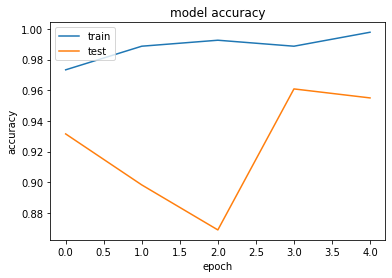

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

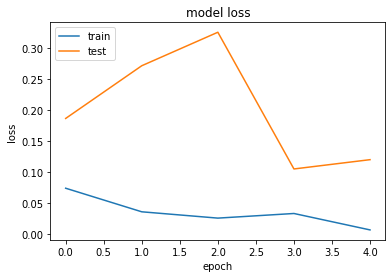

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
results = model.evaluate(test_batches, verbose=0)

for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

loss :  1.1294286251068115
accuracy :  0.7028928995132446
precision :  0.7085307836532593
recall :  0.7013291716575623
auc :  0.8937482237815857


In [ ]:
def ECA(x):
    k_size = 3 
    squeeze = tf.reduce_mean(x,(2,3),keepdims=False)
    squeeze = tf.expand_dims(squeeze, axis=1)
    attn = layers.Conv1D(filters=1,
    kernel_size=k_size,
    padding='same',
    kernel_initializer='random_normal',
    use_bias=False)(squeeze)

    attn = tf.expand_dims(tf.transpose(attn, [0, 2, 1]), 3)
    attn = tf.math.sigmoid(attn)
    scale = x * attn
    return x * attn

In [ ]:
IMG_SIZE = 224
n_classes = 4

inp = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x1 = layers.Resizing(IMG_SIZE, IMG_SIZE)(inp)
x2 = layers.Rescaling(1./255)(x1)
x3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3))(x2)
x4 = ECA(x3)
x5 = layers.BatchNormalization(axis=-1)(x4)
x6 = layers.MaxPool2D(pool_size=(2, 2))(x5)
x7 = layers.Conv2D(filters=64, kernel_size=(3, 3), 
                   activation='relu', padding = 'same')(x6)
x8 = ECA(x7)
x9 = layers.BatchNormalization(axis=-1)(x8)
x10 = layers.MaxPool2D(pool_size=(2, 2))(x9)
x11 = layers.Conv2D(filters=128, kernel_size=(3, 3), 
                    activation='relu', padding = 'same')(x10)
x12 = ECA(x11)
x13 = layers.BatchNormalization(axis=-1)(x12)
x14 = layers.MaxPool2D(pool_size=(2, 2))(x13)
x15 = layers.Conv2D(filters=256, kernel_size=(3, 3), 
                      activation='relu', padding = 'same')(x14)
x16 = ECA(x15)
x17 = layers.BatchNormalization(axis=-1)(x16)
x18 = layers.MaxPool2D(pool_size=(2, 2))(x17)
y1 = layers.Flatten()(x18)
y2 = layers.Dense(300, activation='relu')(y1)
y3 = layers.Dense(150, activation='relu')(y2)
y4 = layers.Dropout(0.25)(y3)
y = layers.Dense(n_classes, activation='softmax')(y4)   


model_ECA = tf.keras.Model(inp, y)

In [ ]:
model_ECA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=METRICS)

In [ ]:
history_ECA = model_ECA.fit(x=train_batches,
                            validation_data=validation_batches,
                            steps_per_epoch=len(train_batches),
                            validation_steps=len(validation_batches),
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE, 
                            verbose=2)

In [ ]:
model_ECA.summary()

In [ ]:
plot_loss(history_ECA, 0)

In [ ]:
results = model_ECA.evaluate(test_batches, verbose=0)

for name, value in zip(model_ECA.metrics_names, results):
    print(name, ': ', value)

In [ ]:
def cbam_block(cbam_feature, ratio=8):
    """Contains the implementation of Convolutional Block Attention Module(CBAM) block.
    As described in https://arxiv.org/abs/1807.06521.
    """
    
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    channel = input_feature.shape[channel_axis]
    
    shared_layer_one = Dense(channel//ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    
    avg_pool = GlobalAveragePooling2D()(input_feature)    
    avg_pool = Reshape((1,1,channel))(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel)
    
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    assert max_pool.shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    assert max_pool.shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    assert max_pool.shape[1:] == (1,1,channel)
    
    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    
    if K.image_data_format() == "channels_first":
        channel = input_feature.shape[1]
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = input_feature.shape[-1]
        cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    assert avg_pool.shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    assert max_pool.shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat.shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat)	
    assert cbam_feature.shape[-1] == 1
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

In [ ]:
IMG_SIZE = 224
n_classes = 4

inp = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x1 = layers.Resizing(IMG_SIZE, IMG_SIZE)(inp)
x2 = layers.Rescaling(1./255)(x1)
x3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3))(x2)
x4 = cbam_block(x3)
x5 = layers.BatchNormalization(axis=-1)(x4)
x6 = layers.MaxPool2D(pool_size=(2, 2))(x5)
x7 = layers.Conv2D(filters=64, kernel_size=(3, 3), 
                   activation='relu', padding = 'same')(x6)
x8 = cbam_block(x7)
x9 = layers.BatchNormalization(axis=-1)(x8)
x10 = layers.MaxPool2D(pool_size=(2, 2))(x9)
x11 = layers.Conv2D(filters=128, kernel_size=(3, 3), 
                    activation='relu', padding = 'same')(x10)
x12 = cbam_block(x11)
x13 = layers.BatchNormalization(axis=-1)(x12)
x14 = layers.MaxPool2D(pool_size=(2, 2))(x13)
x15 = layers.Conv2D(filters=256, kernel_size=(3, 3), 
                      activation='relu', padding = 'same')(x14)
x16 = cbam_block(x15)
x17 = layers.BatchNormalization(axis=-1)(x16)
x18 = layers.MaxPool2D(pool_size=(2, 2))(x17)
y1 = layers.Flatten()(x18)
y2 = layers.Dense(300, activation='relu')(y1)
y3 = layers.Dense(150, activation='relu')(y2)
y4 = layers.Dropout(0.25)(y3)
y = layers.Dense(n_classes, activation='softmax')(y4)   


model_CBAM = tf.keras.Model(inp, y)

In [ ]:
model_CBAM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                   loss='categorical_crossentropy', 
                   metrics=METRICS)

In [ ]:
history_CBAM = model_CBAM.fit(x=train_batches,
                              validation_data=validation_batches,
                              steps_per_epoch=len(train_batches),
                              validation_steps=len(validation_batches),
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE, 
                              verbose=2)

In [ ]:
model_CBAM.summary()

In [ ]:
plot_loss(history_CBAM, 0)

In [ ]:
results = model_CBAM.evaluate(test_batches, verbose=0)

for name, value in zip(model_CBAM.metrics_names, results):
    print(name, ': ', value)

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):

        gradModel = tf.keras.Model(
        inputs=[self.model.inputs],
        outputs=[self.model.get_layer(self.layerName).output,
                 self.model.output])
      
        with tf.GradientTape() as tape:

            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        

        grads = tape.gradient(loss, convOutputs)

        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        
      
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        

        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
    
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):

        heatmap = cv2.applyColorMap(heatmap, colormap)
        image = np.asarray(image, np.float64)
        heatmap = np.asarray(heatmap, np.float64)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        return (heatmap, output)

In [ ]:
def show_heatmap(model, img_path):
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    i = np.argmax(preds[0])
    label_to_class = {'NonDemented': 0,
                      'VeryMildDemented': 1,
                      'MildDemented': 2,
                      'ModerateDemented': 3}

    class_to_label = {v: k for k, v in label_to_class.items()}

    label = class_to_label[i]
    print(f'Predicted class: {label} | Prediction probability: {max(preds[0]) * 100}%')
    
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    (heatmap, output) = cam.overlay_heatmap(heatmap, image[0], alpha=0.5)
    
    output = output.astype(np.uint8)
    plt.imshow(output, interpolation='nearest')
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
img_path = "/content/drive/MyDrive/Alzheimer_s Dataset-2/train/ModerateDemented/moderateDem0.jpg"
show_heatmap(model,img_path)

In [ ]:
img_path = "/content/drive/MyDrive/Alzheimer_s Dataset-2/test/NonDemented/26 (62).jpg"
show_heatmap(model,img_path)